# Linear algebra

## Applications

Modern applications are like:
- Solving for unknowns in ML algorithms.
- Reducing dimensionality (e.g. principal component analysis)
- Ranking results
- Recommenders
- Natural language processing
    - Topic modeling
    - Semantic analysis

## Libraries

To check every exercise here, import all libraries first, and then, run all codes below

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import torch as pt
import tensorflow as tf

## Exercise 1

Jill designs solar panels as a hobby.
On April 1st, Jill's "Mark I" design begins generating power: 1kJ/day.
On May 1st, her "Mark II" design begins generating 4kJ of power per day.
1. What day is it when JIll's Mark II design has generated as much total energy as the Mark I design?
2. How much total energy have both generated by that day?
3. What would the solutions to 1. and 2. be if Mark II design generated 1kJ of power per day?

In [108]:
t = np.linspace(0, 50, 1000)

# Equations for each design
ec1 = 1 * t # Ecuations for Mark I
ec2 = 4 * (t - 30) # Ecuations for Mark II
ec3 = 1 * (t - 30) # Ecuations for Mark II if generates 1kJ per day

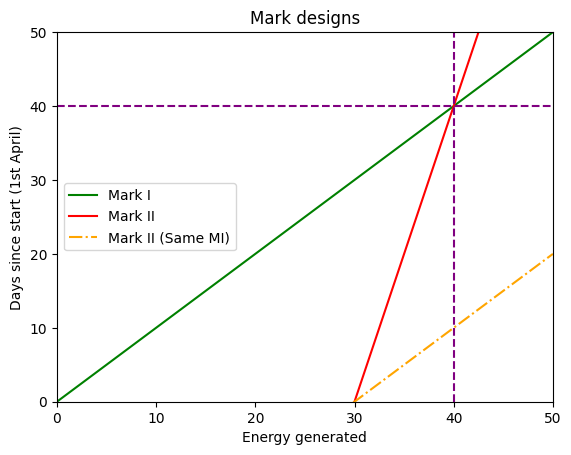

In [109]:
fig, ax = plt.subplots()
plt.title("Mark designs")
plt.xlabel("Energy generated")
plt.ylabel("Days since start (1st April)")
ax.set_xlim([0, 50])
ax.set_ylim([0, 50])
ax.plot(t, ec1, label="Mark I", c="green")
ax.plot(t, ec2, label="Mark II", c="red")
ax.plot(t, ec3, label="Mark II (Same MI)", c="orange", linestyle='-.')
ax.legend()
plt.axvline(x=40, color='purple', linestyle='--')
plt.axhline(y=40, color='purple', linestyle='--')
plt.show()

## Scalars

Scalars have the following characteristics: 
- Doesn't have dimensions.
- Is a single number.
- Is denoted in lowercase and italics, e.g. *x*.
- Should be typed, like all other tensors: e.g., int, float32.

### Scalars in based Python

In [110]:
x = 10  # First scalar
y = 30.0  # Second scalar

print(type(x))
print(type(y))

<class 'int'>
<class 'float'>


In [111]:
sum_xy = x + y
print(sum_xy)
print(type(sum_xy))

40.0
<class 'float'>


### Scalars in PyTorch

- PyTorch tensors are designed to be pythonic, i.e, to feel and behave like NumPy arrays.
- The advantage of PyTorch tensors relative to NumPy arrays is that they easily be used for operations on GPU

In [112]:
x_pt = pt.tensor(25)
print(type(x_pt))

<class 'torch.Tensor'>


In [113]:
x_pt.shape

torch.Size([])

### Scalars in TensorFlow

TensorFlow is an older library than PyTorch, though PyTorch has easier methods to optimize and use GPU resources. To declare tensors TF has different wrappers
- tf.Variable
- tf.constant
- tf.placeholder
- tf.SpareTensor

In [114]:
x_tf = tf.Variable(25)
print(type(x_tf))

<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>


In [115]:
x_tf.shape

TensorShape([])

## Vectors 

- Are one dimensional array of numbers.
- Denoted in lowercase, italics, bold, e.g. <strong>*x*</strong>
- Arranged in an order, so element can be accessed by its index
    - Elements are scalars so not bold, e.g., second element of <strong>*x*</strong> is *x<sub>2</sub>*
- Representing a point in space:
    - Vector of length two represents location in 2D matrix
    - Length of three represents location in 3D cube
    - Length of *n* represents location in *n*-dimensional tensor

### Vectors in Numpy

In [116]:
vec1 = np.array([1, 2, 3, 4, 5])
vec1

array([1, 2, 3, 4, 5])

In [117]:
len(vec1)

5

In [118]:
vec1.shape

(5,)

In [119]:
type(vec1)

numpy.ndarray

#### Vector Transposition

Is the effecto to change the shape of a tensor, usually in vector or matrix

In [120]:
# Tranposing a regular 1-D array has no effect
vec1_T = vec1.T
vec1_T

array([1, 2, 3, 4, 5])

In [121]:
vec1_T.shape

(5,)

#### Zero Vectors

Have no effect if added to another vector

In [122]:
zero_vec = np.zeros(5)
zero_vec

array([0., 0., 0., 0., 0.])

### Vectors in PyTorch

In [123]:
vec_pt = pt.tensor([1,2,3,4,5])
vec_pt

tensor([1, 2, 3, 4, 5])

In [124]:
vec_pt.shape

torch.Size([5])

#### Vector transposition

In [125]:
# Transposing a PyTorch tensor has no effect it could return an error
vec_pt_T = vec_pt.T
vec_pt_T

tensor([1, 2, 3, 4, 5])

#### Zero Vectors

In [126]:
zero_vec_pt = pt.zeros(5)
zero_vec_pt

tensor([0., 0., 0., 0., 0.])

### Vectors in TensorFlow

In [127]:
vec_tf = tf.Variable([1,2,3,4,5])
vec_tf

<tf.Variable 'Variable:0' shape=(5,) dtype=int32, numpy=array([1, 2, 3, 4, 5], dtype=int32)>

In [128]:
vec_tf.shape

TensorShape([5])

#### Vector transposition

In [129]:
vec_tf_T = tf.transpose(vec_tf)
vec_tf_T

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([1, 2, 3, 4, 5], dtype=int32)>

#### Zero Vectors

In [130]:
zero_vec_T = tf.zeros(5)
zero_vec_T

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 0., 0., 0., 0.], dtype=float32)>

## Norms 
Are functions that quantify vector magnitude, the equation that represents the p-Norm is:

$$
||x||_p = (\sum_{i}|x_{i}|^{p})^\frac{1}{p}
$$

- *p* must be:
    - A real number
    - Greater tahn or equal to one
- Can derive *L*<sup>1</sup>, *L*<sup>2</sup> and *L*<sup>∞</sup> norm formulae by substituting for *p*
    - *L*<sup>1</sup> represents distance if you move in a grid place, like streets in a city
    - *L*<sup>2</sup> measures the Euclidean distance, which means, the "direct" between the origin and the end
    - *L*<sup>∞</sup> gets the maximum absolute value from a vector 


## Matrices

- They are two-dimensional tensors
- Denoted in uppercase, italics, bold, e.g.: <strong>*X*</strong>
- Height given priority ahead of width in notation, i.e.: (n<sub>row</sub>, n<sub>col</sub>)
    - If <strong>*X*</strong> has three rows and two columns, its shape is (3,2)
- Individual scalars elements denoted in uppercase, italics only
    - Element in top-right corner of matrix <strong>*X*</strong> above would be *X*<sub>1,2</sub>
- Colon represents an entire row or column:
    - Left column of matrix <strong>*X*</strong> is <strong>*X*</strong><sub>:,1</sub>
    - Middle row of matrix <strong>*X*</strong> is <strong>*X*</strong><sub>2,:</sub>


### Matrices in Numpy

In [131]:
# array function with brackets nested
X = np.array([[1,2,3], [4,5,6], [7,8,9]])
X

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [132]:
X.shape

(3, 3)

In [133]:
X.size

9

In [134]:
# Select left column of matrix X
X[:,0]

array([1, 4, 7])

In [135]:
# Slicin the matrix X
X[0:2, 0:2]

array([[1, 2],
       [4, 5]])

### Matrices in PyTorch

In [136]:
X_pt = pt.tensor([[1,2,3], [4,5,6], [7,8,9]])
X_pt

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [137]:
X_pt.shape

torch.Size([3, 3])

In [138]:
X_pt[0:2, 0:2]

tensor([[1, 2],
        [4, 5]])

### Matrices in TensorFlow

In [139]:
X_tf = tf.Variable([[1,2,3], [4,5,6], [7,8,9]])
X_tf

<tf.Variable 'Variable:0' shape=(3, 3) dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]], dtype=int32)>

In [140]:
X_tf.shape

TensorShape([3, 3])

In [141]:
X_tf[0:2, 0:2]

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [4, 5]], dtype=int32)>

## Exercises

1. What is the transpose of this vector [25, 2, -3, -23]
2. What are the dimensions of this matrix Y

$$
Y = 
\left(\begin{array}{}
42 & 4 & 7 & 99\\
-99 & -3 & 17 & 22
\end{array}\right)
$$

3. What is the position of the element in matrix Y with the value of 17?

> I prefer to use PyTorch, but it can solve in Numpy or TensorFlow

In [142]:
# Make the initial vector
vec = pt.tensor([[25,2,-3,-23]])
vec

tensor([[ 25,   2,  -3, -23]])

In [143]:
# 1. Transpose the vector
vec.T

tensor([[ 25],
        [  2],
        [ -3],
        [-23]])

In [144]:
Y = pt.tensor([[42, 4, 7, 99],[-99, -3, 17, 22]])
Y

tensor([[ 42,   4,   7,  99],
        [-99,  -3,  17,  22]])

In [145]:
# 2. Know the shape of the matrix
Y.shape

torch.Size([2, 4])

In [146]:
index = pt.nonzero(Y == 17, as_tuple = False)
index

tensor([[1, 2]])

In [147]:
Y[1:2, 2:3]

tensor([[17]])